<a href="https://colab.research.google.com/github/JuneHou/BirdSpeciesCNN/blob/main/BirdSpecies_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explainatory Data Analysis

# Statistic Description

Due to data is continue updating, the dictionary is for 375 species instead of the 350 species used for the machine learning, because the 350 species doesn't have path dictionary file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.image as mpimg
import plotly.express as px
from sklearn.manifold import TSNE
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import decomposition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
local_path = "/content/drive/MyDrive/NEU/DataMining/Project/"

In [ ]:
train_dir = '/content/drive/MyDrive/NEU/DataMining/Project/train'
test_dir = '/content/drive/MyDrive/NEU/DataMining/Project/test'
val_dir = '/content/drive/MyDrive/NEU/DataMining/Project/valid'

- The dictionary file contains the details of each image. There are 58402 images in total

In [ ]:
# birds.csv. contains three columns
birdSpecies = pd.read_csv('/content/drive/MyDrive/NEU/DataMining/Project/birds375.csv')
birdSpecies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58402 entries, 0 to 58401
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class index  58402 non-null  int64 
 1   filepaths    58402 non-null  object
 2   labels       58402 non-null  object
 3   data set     58402 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
birdSpecies.head(5)

,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


- There are 375 different species of birds in the dataset
- The average size of species is 155 birds

In [ ]:
result = birdSpecies.groupby(['labels']).size()
result.describe()

count    376.000000
mean     155.324468
std       23.505257
min       10.000000
25%      139.000000
50%      151.500000
75%      166.000000
max      259.000000
dtype: float64

- The outlier is either > Q3 + 1.5*IQR or < Q1 - 1.5*IQR
- There are upper half outlier: HOUSE FINCH, OVENBIRD, D-ARNAUDS BARBET, SWINHOES PHEASANT, WOOD DUCK, CASPIAN TERN, RED TAILED HAWK, MARABOU STORK
- There are lower half outlier: BLACK & YELLOW BROADBILL

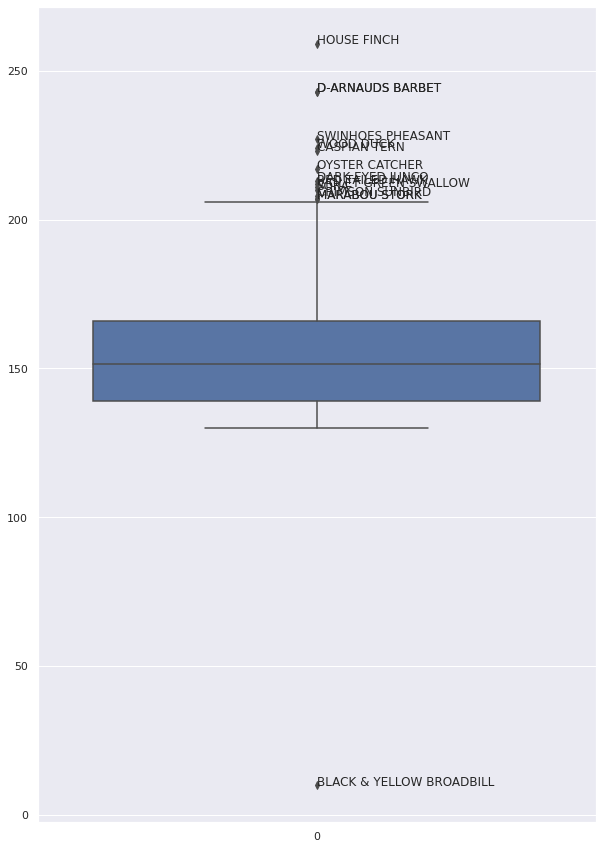

In [ ]:
sns.set(rc = {'figure.figsize':(10,15)})
ax = sns.boxplot(data=result)
q1 = 139
q3 = 166
outlier_top = q3 + 1.5 * (q3 - q1)
outlier_bottom = q1 - 1.5 * (q3 - q1)

for val in result:
    if val > outlier_top or val < outlier_bottom:
        label = result[result == val].index[0]
        plt.text(x=0, y=val, s=label)

- The largest size of species contains 259 bird images, which is "HOUSE FINCH"
- The smallest size of species contains 10 bird images, which is "BLACK & YELLOW BROADBILL"

In [ ]:
# size() is equivalent to counting the distinct rows
result = result.sort_values(ascending=False)
species = result.index
count = result.values
# plot the result
#sns.set(rc = {'figure.figsize':(15,60)})
fig = px.scatter(x=count, y=species, title="Birds in each species", width=800, height=1800,
                 labels={"x":"Count", "y":"Species"})
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.show()

In [ ]:
# size() is equivalent to counting the distinct rows
result = birdSpecies.groupby(['data set']).size()
result = result.sort_values(ascending=False)
text = np.around([result.values[0], result.values[1], result.values[2]]/result.values.sum()*100,2)
# plot the result
sns.set(rc = {'figure.figsize':(8,10)})
fig = px.bar(result, x=result.index, y=result.values, text=text, 
             title="Birds in each data set", labels={"y":"Count"})
fig.show()

# Visualize Transformation in Pytorch

- Random samples from dataset

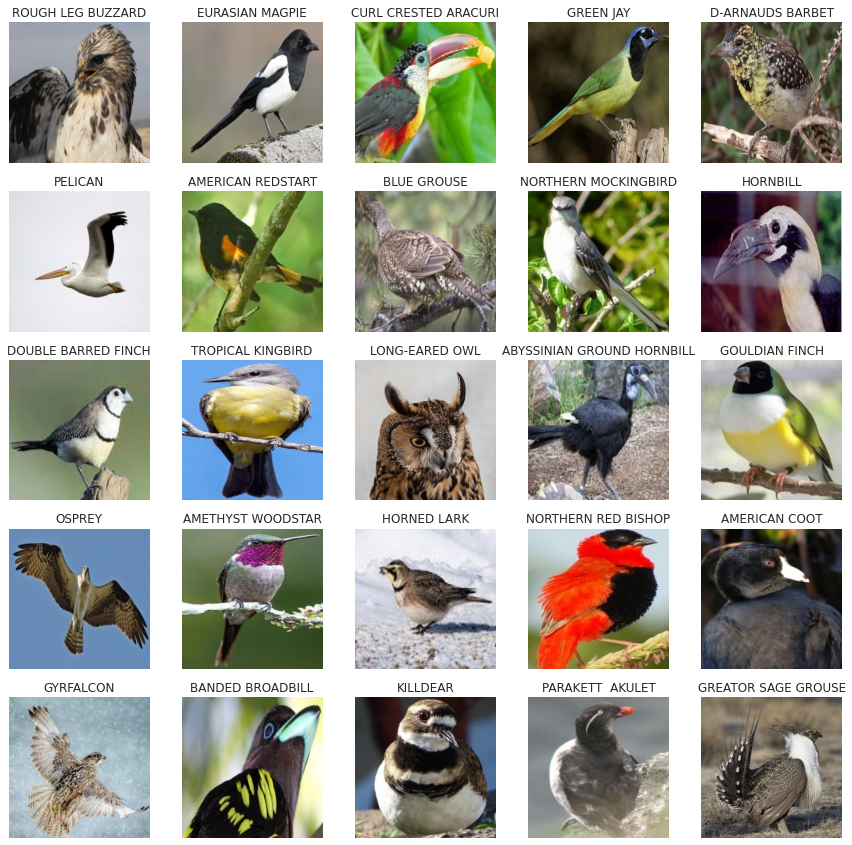

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        sample = birdSpecies.sample()
        species = sample['labels'].to_string(index=False)
        index = sample.index
        filepath = str(sample.filepaths.values)[2:-2]
        random_bird = mpimg.imread(local_path + filepath)
        plt.imshow(random_bird)
        axs[i, j].imshow(random_bird)
        axs[i, j].set_title(species)
        axs[i, j].axis('off')

- In neural network model, data augmentation methos is applied on images to prevent overfitting. All transformation applied after convert images to numpy array. 
- The first row in the plot below shows the random select original image in the dataset, the 2nd row shows the result after normalize the numpy array of images, the 3rd row shows randomly horizontally and vertically flip the images, the last row shows images after adjust contrast, saturation and hue.
- From this we can know, computer read images as set of numbers, which is different to human's eyes.

In [ ]:
from torchvision import transforms
from torchvision.transforms import functional as TF

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:126: UserWarning:

The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)



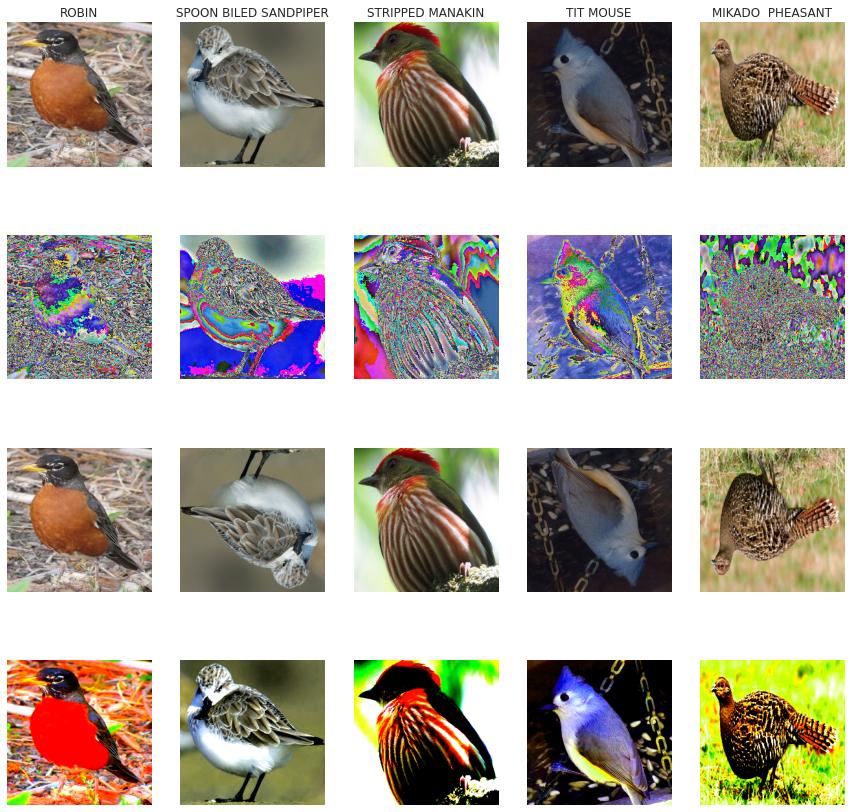

In [ ]:
import PIL.Image as Image
pathset = []
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(15, 15))
for j in range(5):
    sample = birdSpecies.sample()
    species = sample['labels'].to_string(index=False)
    index = sample.index
    filepath = str(sample.filepaths.values)[2:-2]
    pathset.append(local_path + filepath)
    random_bird = mpimg.imread(local_path + filepath)
    plt.imshow(random_bird)
    axs[0, j].imshow(random_bird)
    axs[0, j].set_title(species)
    axs[0, j].axis('off')
    
    # Normalize RGB
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
        transforms.ToPILImage()
    ])
    pil_norm = transform(random_bird)
    axs[1, j].imshow(pil_norm)
    axs[1, j].axis('off')

    # Flip
    transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.RandomHorizontalFlip(p=0.5),
      transforms.RandomVerticalFlip(p=0.5),
      transforms.ToPILImage()
    ])
    pil_flip = transform(random_bird)
    axs[2, j].imshow(pil_flip)
    axs[2, j].axis('off')

    # Color Jitter
    transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.ColorJitter(contrast=(0,5), saturation=(0,5), hue=(-0.1,0.1)),
      transforms.ToPILImage()
    ])
    pil_jitter = transform(random_bird)
    axs[3, j].imshow(pil_jitter)
    axs[3, j].axis('off')

# Feature Selection

In this section, the data set is 350 species version, which is the same as used in the machine learning model. After considering the quality of visualization, first 10 species in the train set are sleected/

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
train_set = birdSpecies[(birdSpecies['data set'] == 'train') & (birdSpecies['class index'] < 10)]

In [ ]:
data = []
labels = []
standardize = StandardScaler()
for i in range(len(train_set)):
    path = train_set.filepaths.iloc[i]
    #path = str(path.values)[2:-2]
    image = np.asarray(Image.open(local_path + path))
    image = np.reshape(image, (224*224*3))
    data.append(image)
    labels.append(train_set.labels.iloc[i])

data = standardize.fit_transform(np.asarray(data))
labels = np.asarray(labels)

> PCA

In [ ]:
pcaModel = decomposition.PCA()
pcaModel.n_components = 2
dfPCAComponents = pcaModel.fit_transform(data)
dfPCAComponents.shape

(1534, 2)

In [ ]:
dfPCAComponents = np.vstack((dfPCAComponents.T,labels)).T
dfPCAComponents = pd.DataFrame(dfPCAComponents,columns=("1st_Component", "2nd_Component", "label"))
print(dfPCAComponents.head())

        1st_Component       2nd_Component            label
0   204.4668337993821  -93.27471613660366  ABBOTTS BABBLER
1  -85.91192704059151  103.09179203960856  ABBOTTS BABBLER
2   92.63382501127217  -92.98939448305806  ABBOTTS BABBLER
3  209.41671163844376  12.927918318461819  ABBOTTS BABBLER
4  209.41671163844376  12.927918318461819  ABBOTTS BABBLER


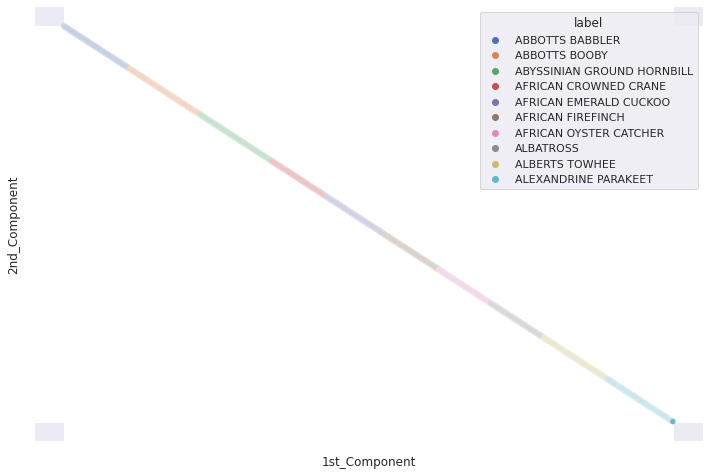

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
plot = sns.scatterplot(data=dfPCAComponents, x="1st_Component", y="2nd_Component", hue="label")
plot.set(xticklabels=[])
plot.set(yticklabels=[])  
plt.show()

- The PCA given features needed to explain 95% variance is 635, so we will use SVD to truncate the features to 635.

In [ ]:
pcaModel = decomposition.PCA()
pcaModel.n_components = 0.95
dfPCAComponents = pcaModel.fit_transform(data)
dfPCAComponents.shape

(1534, 635)

In [ ]:
# Perform Truncated Singular Value Decomposition (TSVD) to reduce features to 635
tsvd_fit = TruncatedSVD(n_components=635).fit_transform(data)

In [ ]:
from sklearn.pipeline import Pipeline
# evaluate pca with logistic regression algorithm for classification
# define the pipeline
steps = [('pca', decomposition.PCA(n_components=10)), ('svc', svm.SVC(kernel='linear'))]
modelsvc = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
modelScores = cross_val_score(modelsvc, tsvd_fit, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(modelScores), std(modelScores)))

Accuracy: 0.3531 (0.0384)


> t-sne

In [ ]:
# Fit t-SNE on the Truncated SVD reduced data (50 features)
tsne_fit = TSNE(n_components=3)
transformed = tsne_fit.fit_transform(tsvd_fit) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
fig = px.scatter_3d(
    transformed, x=0, y=1, z=2,
    color=labels, labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

In [ ]:
tsne_fit10 = TSNE(n_components=10, method='exact')
tsne_trans10 = tsne_fit10.fit_transform(tsvd_fit) 
svc_classifier = svm.SVC(kernel='linear').fit(tsne_trans10, labels)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
modelScores = cross_val_score(svc_classifier, tsne_trans10, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(modelScores), std(modelScores)))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Accuracy: 0.2553 (0.0299)


> Isomap Embedding

In [ ]:
from sklearn.manifold import Isomap

tsne_fit = Isomap(n_components=3)
iso_trans = tsne_fit.fit_transform(tsvd_fit) 

In [ ]:
fig = px.scatter_3d(
    iso_trans, x=0, y=1, z=2,
    color=labels, labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

In [ ]:
from sklearn.manifold import Isomap
# define the pipeline
steps = [('iso', Isomap(n_components=10)), ('svc', svm.SVC(kernel='linear'))]
modelsvc = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
modelScores = cross_val_score(modelsvc, tsvd_fit, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(modelScores), std(modelScores)))

Accuracy: 0.2864 (0.0356)


> Locally Linear Embedding (quick but low accuracy)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('svc', svm.SVC(kernel='linear'))]
modelsvc = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
modelScores = cross_val_score(modelsvc, tsvd_fit, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(modelScores), std(modelScores))) 

Accuracy: 0.1247 (0.0200)


In [ ]:
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=5, method='modified', n_neighbors=10)), ('svc', svm.SVC(kernel='linear'))]
modelsvc = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
modelScores = cross_val_score(modelsvc, tsvd_fit, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(modelScores), std(modelScores))) 

Accuracy: 0.1173 (0.0004)


# Conclusion

- From the plots, we can see PCA did the best job in 2D, and Isomap is better than t-SNE in 3D. From the accuracy of SVC on grouped data, we can see PCA given higest accuracy.
- PCA might be considered before performing machine learning to improve accuracy.